In [4]:
from essi21 import mixing as mm
import numpy as np
import matplotlib.pyplot as plt

## Neukum stuff

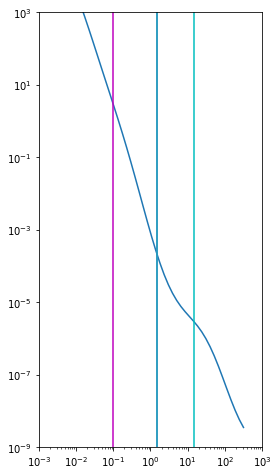

In [46]:
f = plt.figure(figsize=(4, 8))
diams = np.logspace(-3, 2.5) * 1e3
n = np.array([mm.neukum(diam, mm.IVANOV2000) for diam in diams])
plt.loglog(diams*1e-3, n*1e6 * 1e9)
plt.axvline(.1, color='m')
plt.axvline(1.5, color='m')
plt.axvline(1.5, color='c')
plt.axvline(15, color='c')

plt.xlim(0.001, 1000)
plt.ylim(1e-9, 1e3)
plt.show()

In [6]:
num_cn = mm.neukum(100, mm.NEUKUM1983) - mm.neukum(1.5e3, mm.NEUKUM1983)
num_ci = mm.neukum(100, mm.IVANOV2000) - mm.neukum(1.5e3, mm.IVANOV2000)
print(100*(num_cn - num_ci)/num_ci)
# print(num_ci)

num_dn = mm.neukum(1.5e3, mm.NEUKUM1983) - mm.neukum(15e3, mm.NEUKUM1983)
num_di = mm.neukum(1.5e3, mm.IVANOV2000) - mm.neukum(15e3, mm.IVANOV2000)
print(100*(num_dn - num_di)/num_di)
# print(num_ci)

num_en = mm.neukum(15e3, mm.NEUKUM1983) - mm.neukum(300e3, mm.NEUKUM1983)
num_ei = mm.neukum(15e3, mm.IVANOV2000) - mm.neukum(300e3, mm.IVANOV2000)
print(100*(num_en - num_ei)/num_ei)
# print(num_ci)

0.0533551730147042
-2.2316246537284448
-56.21954305107374


## Scaling equations


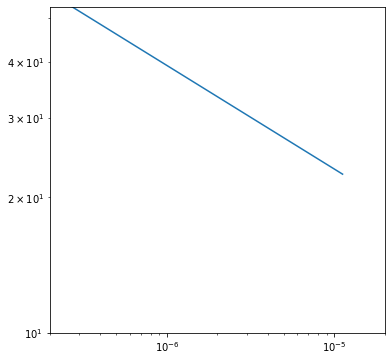

In [41]:
# i_lengths = nplinspace(0.8, 1200)

def pi2(length):
    U = 12.7e3  # m
    g = 1.62  # m/s^2
    return length * 1.61 * g / U**2

def pid(diam, length):
    rho_i = mm.IMPACTOR_DENSITY
    rho_t = mm.TARGET_DENSITY
    i_masses = rho_i * mm.diam2vol(length)
    return diam * (rho_t / i_masses) ** (1/3)
# i_lengths = np.linspace(np.min(t_diam) / 100, np.max(t_diam), len(t_diam))


# pid = t_diam * denom
t_diam = np.linspace(80, 12000)
lengths = mm.diam2len_prieur(t_diam)

lengths = lengths

plt.figure(figsize=(6, 6))
plt.loglog(pi2(lengths), pid(t_diam, lengths))
plt.ylim(10, 53)
plt.xlim(0.2e-6, 2e-5)
plt.show()